In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir ='F:\petimages'

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [27]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=.2,width_shift_range =.2,height_shift_range=.2,shear_range=.2,zoom_range=.2,fill_mode='nearest')


In [26]:
train_data_generator =train_datagen.flow_from_directory(train_data_dir,target_size=(150,150),batch_size=50,class_mode='binary',  subset='training')

Found 20000 images belonging to 2 classes.


In [25]:
validation_data_generator =train_datagen.flow_from_directory(train_data_dir,target_size=(150,150),batch_size=20,class_mode='binary',subset='validation')

Found 4999 images belonging to 2 classes.


In [28]:
history=model.fit_generator(train_data_generator,steps_per_epoch=8,epochs=15,validation_data=validation_data_generator,validation_steps=8,verbose=2)

Epoch 1/15
8/8 - 22s - loss: 0.7220 - acc: 0.6050 - val_loss: 0.6302 - val_acc: 0.6500
Epoch 2/15
8/8 - 13s - loss: 0.6394 - acc: 0.6400 - val_loss: 0.6599 - val_acc: 0.5875
Epoch 3/15
8/8 - 14s - loss: 0.6336 - acc: 0.6425 - val_loss: 0.6015 - val_acc: 0.6500
Epoch 4/15
8/8 - 14s - loss: 0.6514 - acc: 0.6200 - val_loss: 0.6349 - val_acc: 0.5750
Epoch 5/15
8/8 - 14s - loss: 0.6172 - acc: 0.6550 - val_loss: 0.6542 - val_acc: 0.6313
Epoch 6/15
8/8 - 15s - loss: 0.5998 - acc: 0.6525 - val_loss: 0.8885 - val_acc: 0.6125
Epoch 7/15
8/8 - 15s - loss: 0.7017 - acc: 0.6075 - val_loss: 0.5973 - val_acc: 0.6875
Epoch 8/15
8/8 - 15s - loss: 0.6188 - acc: 0.6500 - val_loss: 0.5899 - val_acc: 0.6375
Epoch 9/15
8/8 - 14s - loss: 0.6378 - acc: 0.6125 - val_loss: 0.6326 - val_acc: 0.5813
Epoch 10/15
8/8 - 13s - loss: 0.6291 - acc: 0.6575 - val_loss: 0.6084 - val_acc: 0.6812
Epoch 11/15
8/8 - 14s - loss: 0.6152 - acc: 0.6825 - val_loss: 0.6066 - val_acc: 0.6125
Epoch 12/15
8/8 - 13s - loss: 0.5895 - ac

Text(0.5, 1.0, 'Training and validation loss')

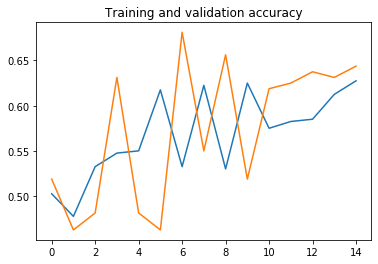

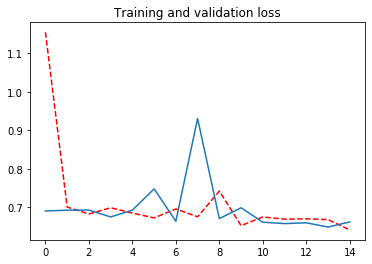

In [18]:
import matplotlib.pyplot as plt 
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss ,'r--')
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )